In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# DATA EXPLORATION :

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.shape
# 303 rows and 14 columns

(303, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F147D10>,
      dtype=object)

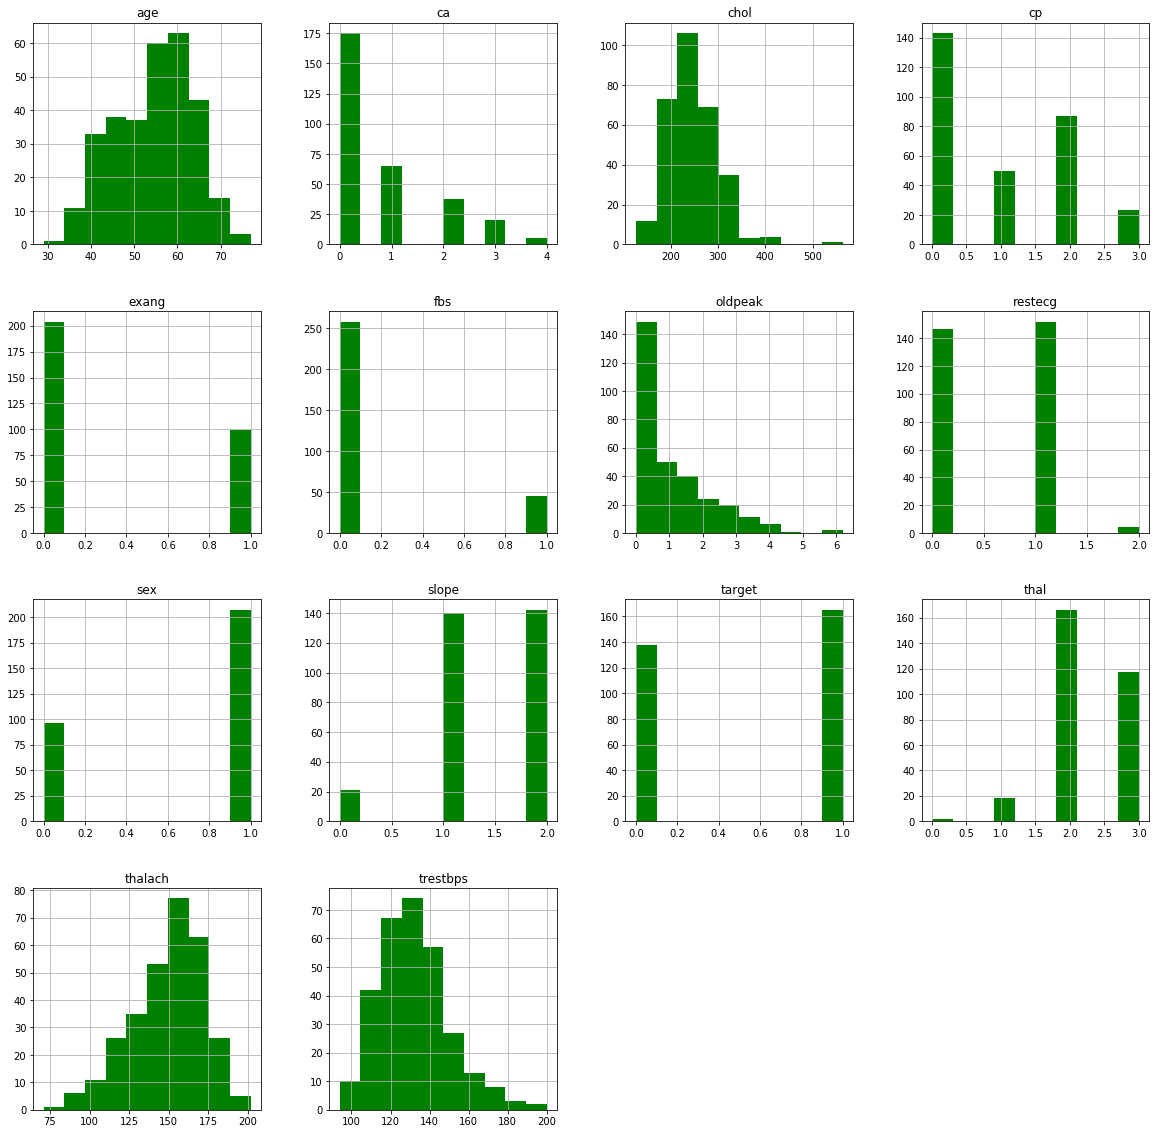

In [7]:
data.hist(figsize=(20,20),color = 'green')

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

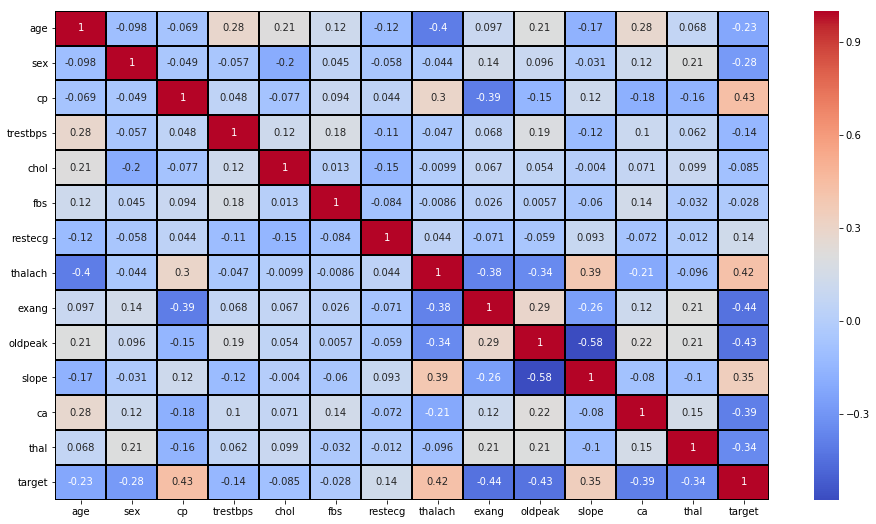

In [9]:
# feature importance
# method 1 : heatmap
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr,cmap = 'coolwarm', annot = True,linewidths = 1,linecolor = 'black')
plt.show()

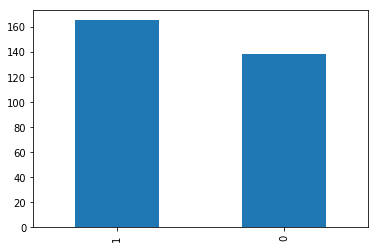

In [10]:
count = pd.value_counts(data['target'])
count.plot(kind = 'bar')
# data is kind of balanced only


In [11]:
X = data.drop(['target'],axis=1)
y = data['target']

In [12]:
model = ExtraTreesClassifier()
m = model.fit(X,y)

C:\Users\Dell\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
print(m.feature_importances_)

[0.06373965 0.06028364 0.10136693 0.05229143 0.06580004 0.02293621
 0.03790349 0.09637631 0.0983952  0.06853538 0.07451792 0.13041252
 0.12744128]


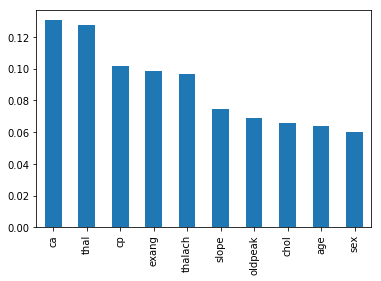

In [14]:
feat_importances = pd.Series(m.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='bar')

In [15]:
# DATA PROCESSING : 

In [16]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
X = pd.get_dummies(X,columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [18]:
# data needs to be scaled for better assessment
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
columnstoscale = ['age','trestbps','chol','thalach','oldpeak']
X[columnstoscale] = ss.fit_transform(X[columnstoscale])

C:\Users\Dell\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [20]:
# Model building :

In [21]:
from sklearn.model_selection import cross_val_score
# Model 1 : KNeighborsClassifier
# https://www.youtube.com/watch?v=otolSnbanQk&list=PLZoTAELRMXVOnN_g96ayzXX5i7RRO0QhL&index=14

from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21) :
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn,X,y,cv=10)
    knn_scores.append(score.mean())


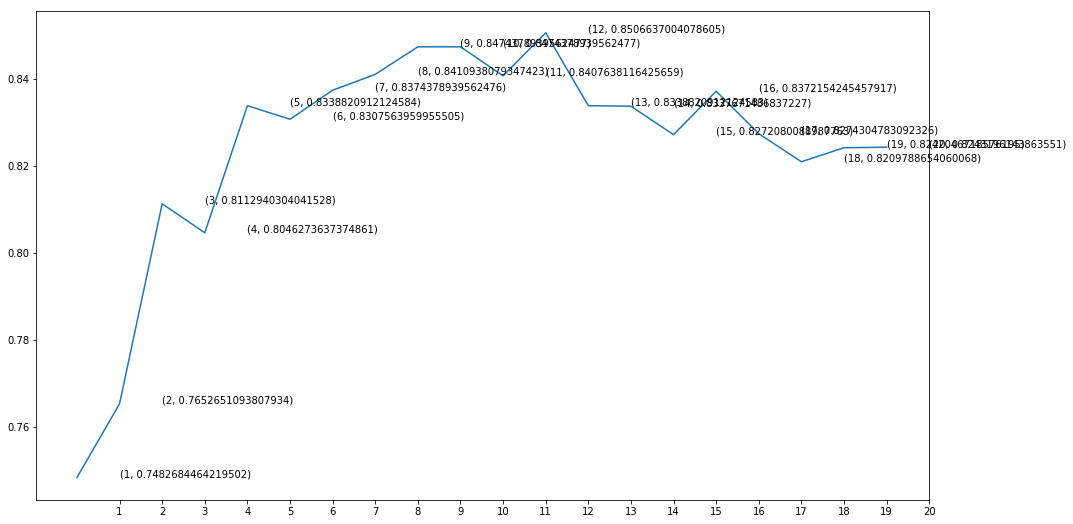

In [22]:
plt.figure(figsize=(16,9))
plt.plot(knn_scores)
plt.xticks([i for i in range(1, 21)])
for i in range(1,21) :
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))

In [27]:
# re-executing it with k=12

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 12)
scores = cross_val_score(knn,X,y,cv=10)
scores.mean()

0.8506637004078605

In [74]:
# Method 2 : Rnadom forest classifer
from sklearn.ensemble import RandomForestClassifier
rn = RandomForestClassifier(n_estimators = 10)
score = cross_val_score(rn,X,y,cv=10)
score.mean()


0.8276529477196887

In [67]:
# Method 3 : DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
score = cross_val_score(dt,X,y,cv=10)
score.mean()

0.7449202817945866